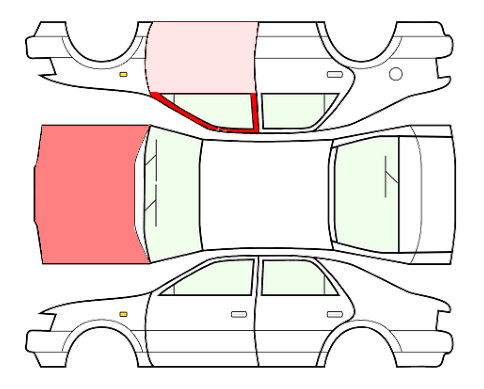

In [14]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import json

# Load the image
img_path = './crop_diagram_data.png'
img = Image.open(img_path)

# Load the LabelMe annotations
annotation_path = './crop_diagram_data.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Create a drawing context
draw = ImageDraw.Draw(img, 'RGBA')

# Example data: number of flaws in different regions

flaw_data = pd.read_csv()
flaw_data = {
    "bonnet": 15,
    'fr_door': 3,
    'fr_window': 30
    # Add other parts with their corresponding flaw counts here...
}

max_flaws = max(flaw_data.values())

# Function to determine the color based on the number of flaws
def get_color(flaw_count):
    # Normalize flaw count to a value between 0 and 255
    color_ratio = 255 / max_flaws
    color_intensity = int(min(flaw_count * color_ratio, 255))
    return (255, 0, 0, color_intensity)  # Red color with varying opacity

# Color the regions based on the flaw data
for shape in annotations['shapes']:
    part_name = shape['label']
    if part_name in flaw_data:
        polygon = [(x, y) for x, y in shape['points']]
        color = get_color(flaw_data[part_name])
        draw.polygon(polygon, fill=color)

img_array = np.array(img)
plt.imshow(img_array)
plt.axis('off')
plt.show()
